In [1]:
#假设你有一个用于三分类任务的数据集，每个样本的输入特征为 4 维，目标输出为一个 one-hot 编码的 3 维向量（例如类别 0 对应 [1, 0, 0]，类别 1 对应 [0, 1, 0]，类别 2 对应 [0, 0, 1]）。请用 PyTorch 构建一个全连接神经网络，其网络结构如下：

#输入层： 4 个神经元

#隐藏层 1： 6 个神经元，使用 ReLU 激活函数

#隐藏层 2： 4 个神经元，使用 Tanh 激活函数

#输出层： 3 个神经元，使用 Softmax 激活函数（输出概率分布，用于三分类）

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [23]:
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()

    #example:
    #>>> m = nn.Linear(20, 30)
    #>>> input = torch.randn(128, 20)
    #>>> output = m(input)
    #>>> print(output.size())
    #torch.Size([128, 30])
    self.layer1 = nn.Linear(4, 6)
    self.layer2 = nn.Linear(6, 4)
    self.layer3 = nn.Linear(4, 3)

    self.layer1.weight.data.copy_(w1)
    self.layer1.bias.data.copy_(b1.flatten())
    self.layer2.weight.data.copy_(w2)
    self.layer2.bias.data.copy_(b2.flatten())
    self.layer3.weight.data.copy_(w3)
    self.layer3.bias.data.copy_(b3.flatten())

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.tanh(self.layer2(x))
    x = self.layer3(x)

    return x

epoch: 1 loss: 1.0992
epoch: 101 loss: 1.0906
epoch: 201 loss: 1.0861
epoch: 301 loss: 1.0837
epoch: 401 loss: 1.0823
epoch: 501 loss: 1.0815
epoch: 601 loss: 1.0808
epoch: 701 loss: 1.0803
epoch: 801 loss: 1.0797
epoch: 901 loss: 1.0791
epoch: 1001 loss: 1.0784
epoch: 1101 loss: 1.0776
epoch: 1201 loss: 1.0765
epoch: 1301 loss: 1.0752
epoch: 1401 loss: 1.0735
epoch: 1501 loss: 1.0713
epoch: 1601 loss: 1.0688
epoch: 1701 loss: 1.0655
epoch: 1801 loss: 1.0612
epoch: 1901 loss: 1.0558
epoch: 2001 loss: 1.0476
epoch: 2101 loss: 1.0371
epoch: 2201 loss: 1.0245
epoch: 2301 loss: 1.0093
epoch: 2401 loss: 0.9917
epoch: 2501 loss: 0.9723
epoch: 2601 loss: 0.9518
epoch: 2701 loss: 0.9307
epoch: 2801 loss: 0.9097
epoch: 2901 loss: 0.8892
epoch: 3001 loss: 0.8695
epoch: 3101 loss: 0.8506
epoch: 3201 loss: 0.8318
epoch: 3301 loss: 0.8127
epoch: 3401 loss: 0.7925
epoch: 3501 loss: 0.7707
epoch: 3601 loss: 0.7468
epoch: 3701 loss: 0.7204
epoch: 3801 loss: 0.6916
epoch: 3901 loss: 0.6540
epoch: 4001 

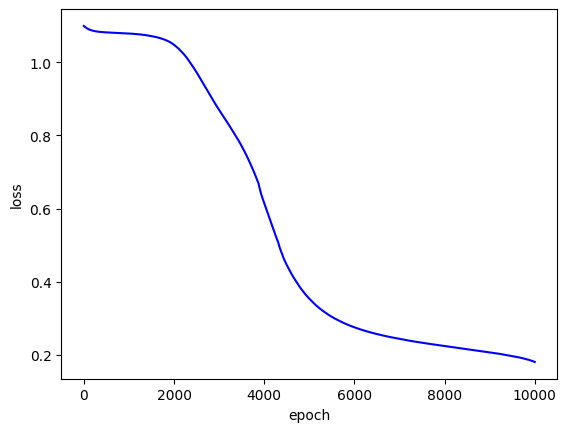

In [24]:
# 假设 8 个样本，每个样本 4 维
x = torch.randn(8, 4)
# 标签为 8 个样本的类别（0, 1, 2中的整数）
y_true = torch.tensor([0, 1, 2, 0, 1, 2, 0, 1])

w1 = torch.randn(6, 4) * 0.1
w1.requires_grad=True
b1 = torch.randn(1, 6) * 0.1
b1.requires_grad=True

w2 = torch.randn(4, 6) * 0.1
w2.requires_grad=True
b2 = torch.randn(1, 4) * 0.1
b2.requires_grad=True

w3 = torch.randn(3, 4) * 0.1
w3.requires_grad=True

b3 = torch.randn(1, 3) * 0.1
b3.requires_grad=True

model = SimpleNN()

#定义损失函数优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 10000

losses = []

for epoch in range(epochs):
  y_pred = model(x)

  #计算损失函数
  loss = criterion(y_pred, y_true)
  losses.append(loss.item())

  #反向传播和优化
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%100 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}")

with torch.no_grad():
  final_pred = model(x)
  print("Final predictions:")
  print(final_pred.numpy().round(4))

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
